# $Pritam$ $Taldhi$
# $BDA$ $SEM$ $2$
# $LINEAR$ $REGRESSION$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

data = pd.read_csv('Consumption_Climate_Average_West_Bengal_2018_2019_2020.csv')

# Extract the input features and output variable
X = data[['avg_max', 'avg_min', 'avg_rain']].values
y = data['Consumption'].values.reshape(-1, 1)

# Split the data into training, validation, and testing sets
train_size = int(0.5 * len(X))
val_size = int(0.2 * len(X))
test_size = len(X) - train_size - val_size

train_X = X[:train_size]
train_y = y[:train_size]

val_X = X[train_size:train_size+val_size]
val_y = y[train_size:train_size+val_size]

test_X = X[train_size+val_size:]
test_y = y[train_size+val_size:]

In [3]:
train_X.shape

(502, 3)

# Add a column of ones to the input features to account for the intercept term

In [4]:

Train_X = np.hstack((np.ones((train_size, 1)), train_X))
Val_X = np.hstack((np.ones((val_size, 1)), val_X))
Test_X = np.hstack((np.ones((test_size, 1)), test_X))

# COMPUTING THE $R^2$

In [5]:
def r2(y,y_hat):
    errors = y - y_hat 
    sse = (errors ** 2).sum()
    tss = ((y - y.mean()) ** 2).sum()    
    r2 = 1 - sse / tss
    return r2

In [6]:
def linear_regression(X, y):
    XTX = X.T.dot(X)
    XTY = X.T.dot(y)
    return np.linalg.solve(XTX, XTY)

In [7]:
k = linear_regression(Train_X,train_y)


# Calculate the mean squared error (MSE) and R-squared (R2) score on the training set

In [8]:
y_prediction = Train_X.dot(k)
mse = np.mean(np.square(y_prediction - train_y))
print('MSE value:', mse)
R2 = r2(train_y, y_prediction)
print('R^2 score:', R2)

MSE value: 116.49294177761759
R^2 score: 0.8183741328275556


# Plot the actual vs predicted graphs for the time series

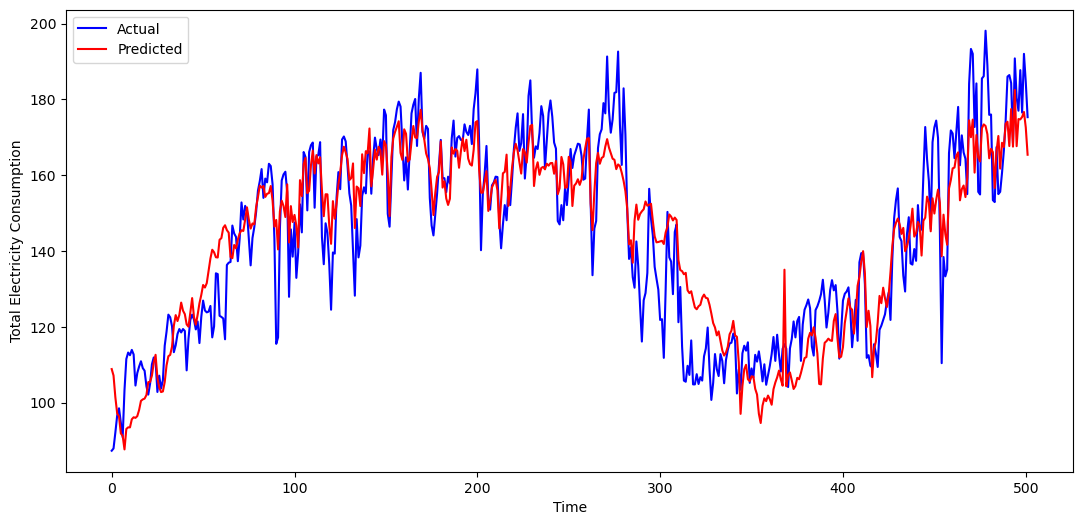

In [9]:

plt.figure(figsize=(13,6))
plt.plot(train_y, label='Actual',color='blue')
plt.plot(y_prediction, label='Predicted',color='red')
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumption')
plt.legend()
plt.show()

# Calculate the mean squared error (MSE) and R-squared (R2) score on the validating set 

In [10]:
y_pred = Val_X.dot(k)
mse = np.mean(np.square(y_pred - val_y))
print('MSE value:', mse)
R2 = r2(val_y, y_pred)
print('R^2 score:', R2)

MSE value: 216.69364269575638
R^2 score: 0.7361841253982455


# Plot the actual vs predicted consumption on the validating set

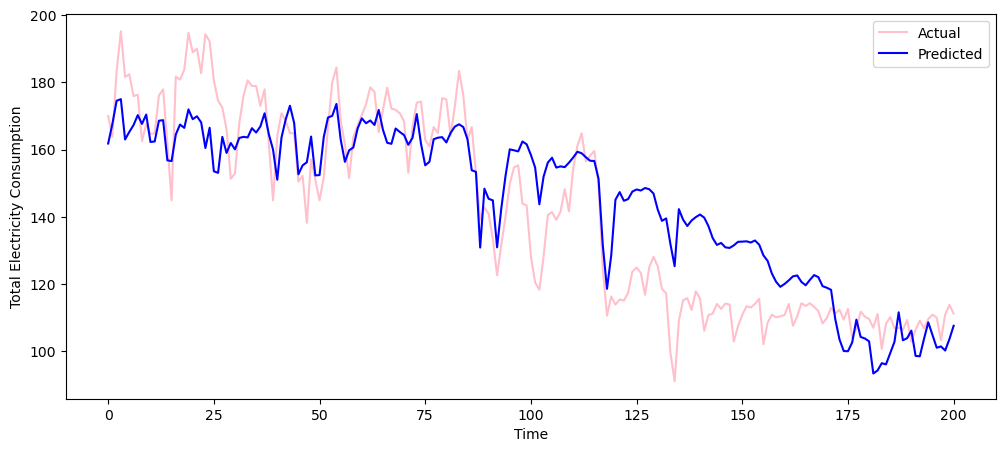

In [11]:
plt.figure(figsize=(12,5))
plt.plot(val_y, label='Actual',color='pink')
plt.plot(y_pred, label='Predicted',color='blue')
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumption')
plt.legend()
plt.show()

# Calculate the mean squared error (MSE) and R-squared (R2) score on the validation set

In [12]:
y_pred = Test_X.dot(k)
mse = np.mean(np.square(y_pred - test_y))
print('MSE value:', mse)
R2 = r2(test_y, y_pred)
print('R^2 score:', R2)

MSE value: 467.60647818217586
R^2 score: 0.23653599959178184


# Plot the actual vs predicted consumption on the validation set

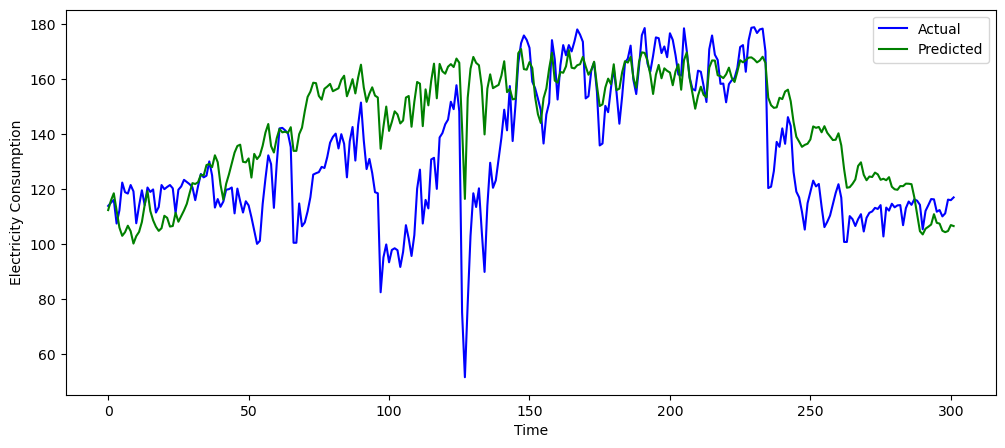

In [13]:

plt.figure(figsize=(12,5))
plt.plot(test_y, label='Actual',color='blue')
plt.plot(y_pred, label='Predicted',color='green')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()



In [14]:
def regression(X, y, degree):
    X_poly = np.column_stack([X**i for i in range(1, degree+1)]) # Create polynomial features
    X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1)))) # Add a column of 1s for the intercept term
    W = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y) # Compute the weight matrix
    return W

Degree 1: MSE = 216.69364269577633, R2 = 0.7361841253982213
Degree 2: MSE = 116.30654808132599, R2 = 0.858401412601354
Degree 3: MSE = 117.66706546499825, R2 = 0.8567450369042214
Degree 4: MSE = 123.50795721488419, R2 = 0.8496339839620093


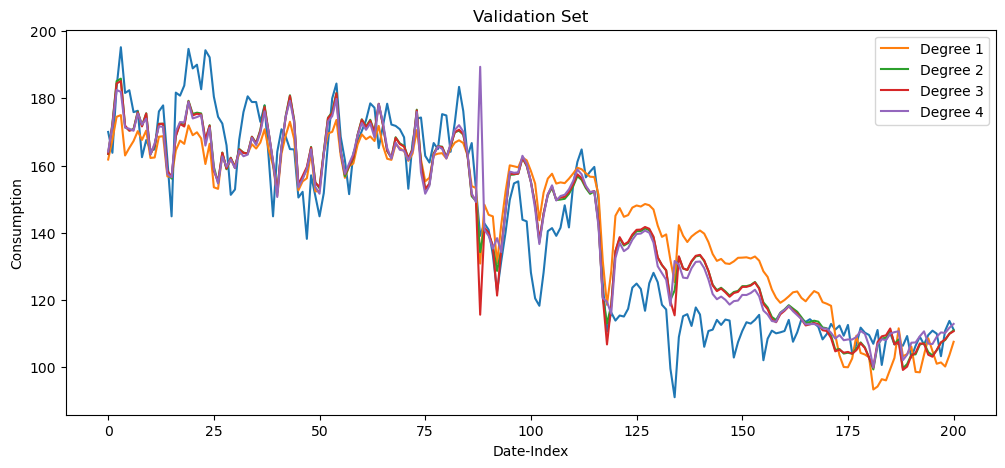

In [15]:
# List of degrees 
degrees = [1,2,3,4]

# Plot the original and predicted consumption values for the validation set for each degree of polynomial
plt.figure(figsize=(12,5))
plt.plot( val_y, label='Original' if degrees == 1 else None)

r2_scores = []
mse_vals = []
for deg in degrees:
    # Fit the model and make predictions for the validation set
    W = regression(train_X, train_y, deg)
    X_poly = np.column_stack([val_X**i for i in range(1, deg+1)])
    #print(X_poly)
    X_Poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
    #print(X_Poly)
    y_pred = np.dot(X_Poly, W)
    
    # Compute RMSE and R2 on the validation set
    R2 = r2(val_y, y_pred)
    r2_scores.append(R2)
    mse = np.mean(np.square(y_pred - val_y))
    mse_vals.append(mse)
    print(f"Degree {deg}: MSE = {mse}, R2 = {R2}")
    
    # Plot the predictions
    label = f'Degree {deg}'
    plt.plot(y_pred, label=label)    


#print(r2_scores)


plt.legend()
plt.title('Validation Set')
plt.xlabel('Date-Index')
plt.ylabel('Consumption')
plt.show()

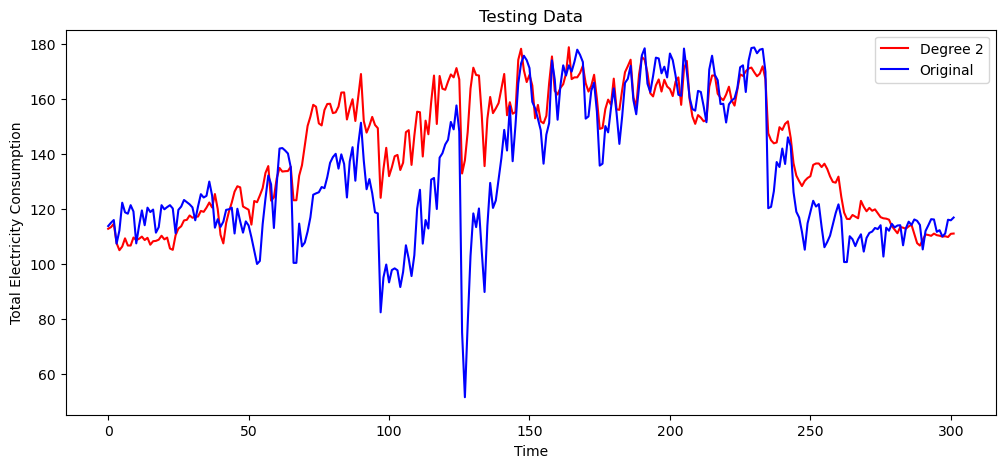

Degree 2: MSE = 374.65321551540995, R2 = 0.3883013687167942


In [16]:
deg = 2
plt.figure(figsize=(12,5))


# Fit the model and make predictions for the test set
W = regression(train_X, train_y, deg)
X_poly = np.column_stack([test_X**i for i in range(1, deg+1)])
X_poly = np.hstack((X_poly, np.ones((X_poly.shape[0], 1))))
y_pred = np.dot(X_poly, W)

# Compute MSE and R^2 on the test set
mse = np.mean(np.square(y_pred - test_y))
R2 = r2(test_y, y_pred)
    
# Plot the prediction
label = f'Degree {deg}'
plt.plot(y_pred, label=label,color='red')
        
plt.plot(test_y, label='Original',color='blue')
    
plt.legend()
plt.title('Testing Data')
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumption')
plt.show()

print(f"Degree 2: MSE = {mse}, R2 = {R2}")

# $Ridge$ $Regression$

In [17]:
def ridge_regression(X, y, alpha):
    n, p = X.shape
    XtX = X.T.dot(X)
    XtX_alpha = XtX + alpha * np.identity(p)
    XtY = X.T.dot(y)
    return np.linalg.solve(XtX_alpha, XtY)

In [18]:
#plt.figure(figsize=(12,5))
#plt.plot(val_y, label='Original')

lambdas = np.linspace(0,10,num = 1000000)

r2_scores = []
mse_vals = []
for lmbda in lambdas:
    w = ridge_regression(Train_X, train_y, lmbda)
    y_pred = Val_X.dot(w)
    R2 = r2(val_y, y_pred)
    r2_scores.append(R2)
    mse = np.mean(np.square(y_pred - val_y))
    mse_vals.append(mse)
    
    #plt.plot(y_pred, label=f"Lambda {lmbda}")
    #print(f"Lambda {lmbda}: MSE = {mse}, R2 = {R2}")

""""plt.legend()
plt.title('Plotting on Validation Set')
plt.xlabel('Time')
plt.ylabel('Total Electricity Consumption')
plt.show()"""
best_lambda = lambdas[np.argmax(r2_scores)]
print('Best lambda:', best_lambda)

Best lambda: 7.785937785937786


# Taking $\lambda\$ =7.785937785937786  and appliyng Ridge Regression

In [19]:
w= ridge_regression(Train_X, train_y, best_lambda)


# Checking the model on training data

In [20]:
y_pred = Train_X.dot(w)
mse = np.mean(np.square(y_pred - train_y))
print('MSE value:', mse)
R2 = r2(train_y, y_pred)
print('R^2 score:', R2)

MSE value: 119.61315597038866
R^2 score: 0.8135093607660203


# Plotting the actual values vs predicted values graph

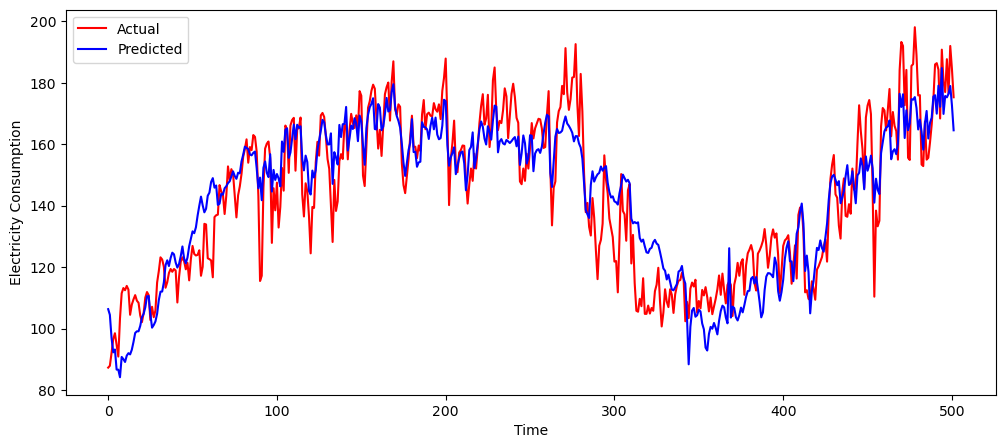

In [21]:
plt.figure(figsize=(12,5))
plt.plot(train_y, label='Actual',color='red')
plt.plot(y_pred, label='Predicted',color='blue')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# Checking the model on validation data

In [22]:
y_pred = Val_X.dot(w)
mse = np.mean(np.square(y_pred - val_y))
print('MSE value:', mse)
R2 = r2(val_y, y_pred)
print('R^2 score:', R2)


MSE value: 210.1573012120502
R^2 score: 0.744141860677267


# Plotting the actual values vs predicted values graph

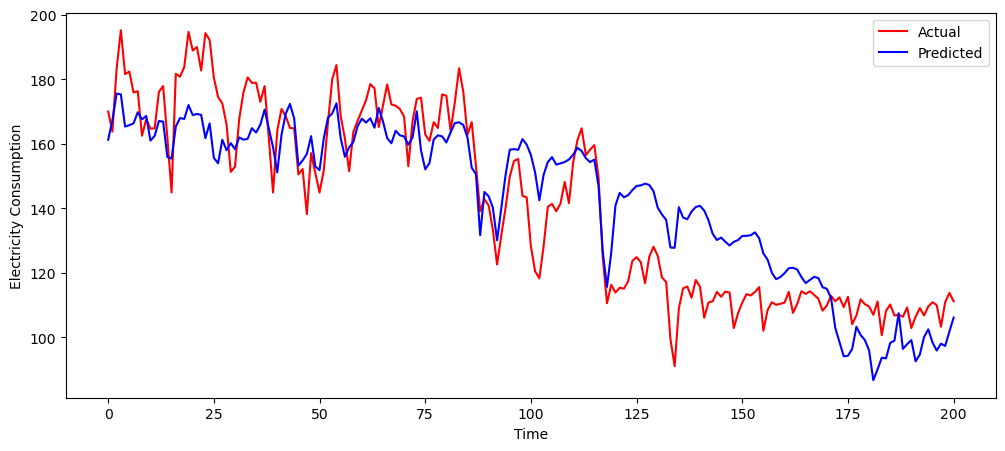

In [23]:
plt.figure(figsize=(12,5))
plt.plot(val_y, label='Actual',color='red')
plt.plot(y_pred, label='Predicted',color='blue')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# Checking the model on Testing data

In [24]:

y_pred = Test_X.dot(w)
mse = np.mean(np.square(y_pred - test_y))
print('MSE value:', mse)
R2 = r2(test_y, y_pred)
print('R^2 score:', R2)

MSE value: 480.10307182913596
R^2 score: 0.2161327335500589


# Plotting the actual values vs predicted values graph

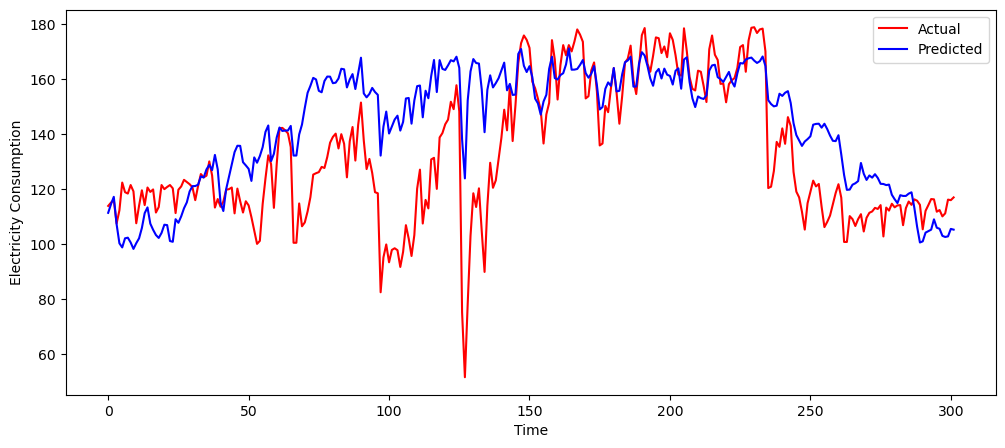

In [25]:

plt.figure(figsize=(12,5))
plt.plot(test_y, label='Actual',color='red')
plt.plot(y_pred, label='Predicted',color='blue')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()